In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

In [37]:
task1_df = pd.read_csv("task1/ts.csv", delimiter=',')
task1_df.rename(columns={'Unnamed: 0': 'date', '0': 'val'}, inplace=True)
task1_df['date'] = pd.to_datetime(task1_df['date'])
task1_df["d_val_s"] = task1_df['val'].diff(8) # remove trend and season
task1_df

,date,val,d_val_s
0,2011-07-13,1.649925e+06,NaN
1,2011-07-14,1.439200e+06,NaN
2,2011-07-15,2.377505e+06,NaN
3,2011-07-16,4.043366e+06,NaN
4,2011-07-17,2.972691e+06,NaN
...,...,...,...
2694,2018-11-27,6.236346e+06,-4.520404e+05
2695,2018-11-28,5.788579e+06,-7.398540e+05
2696,2018-11-29,5.524261e+06,-7.551902e+05
2697,2018-11-30,6.476017e+06,4.646959e+05


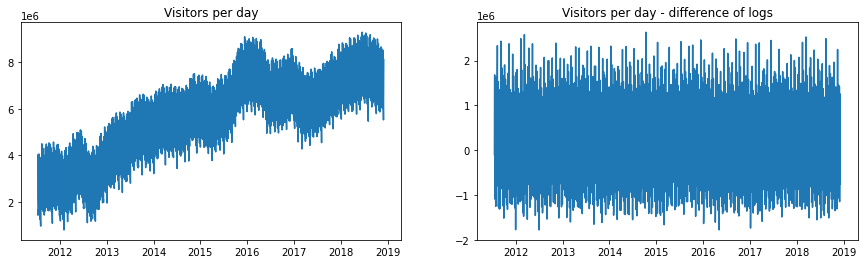

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

axes[0].plot(task1_df['date'], task1_df['val'], '-')
axes[0].set(title='Visitors per day')

axes[1].plot(task1_df['date'], task1_df['d_val_s'], '-')
axes[1].set(title='Visitors per day - difference of logs');

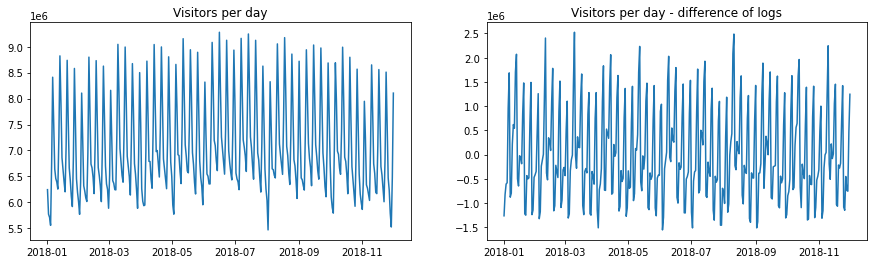

In [38]:
task1_df_2018 = task1_df.loc[task1_df['date'].dt.year == 2018]

fig, axes = plt.subplots(1, 2, figsize=(15,4))

axes[0].plot(task1_df_2018['date'], task1_df_2018['val'], '-')
axes[0].set(title='Visitors per day')

axes[1].plot(task1_df_2018['date'], task1_df_2018['d_val_s'], '-')
axes[1].set(title='Visitors per day - difference of logs');

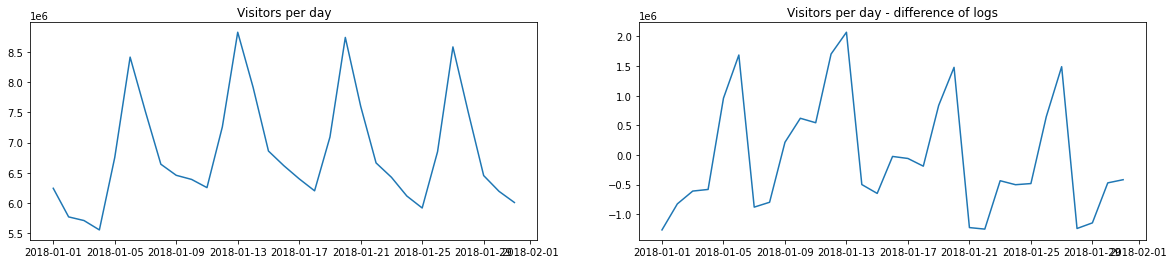

In [39]:
task1_df_2018_01 = task1_df.loc[(task1_df['date'].dt.year == 2018) & (task1_df['date'].dt.month == 1)]

fig, axes = plt.subplots(1, 2, figsize=(20,4))

axes[0].plot(task1_df_2018_01['date'], task1_df_2018_01['val'], '-')
axes[0].set(title='Visitors per day')

axes[1].plot(task1_df_2018_01['date'], task1_df_2018_01['d_val_s'], '-')
axes[1].set(title='Visitors per day - difference of logs');

In [40]:
X = task1_df['val']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.925589
p-value: 0.320121
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [41]:
X = task1_df.iloc[8:]['d_val_s']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.275314
p-value: 0.000006
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


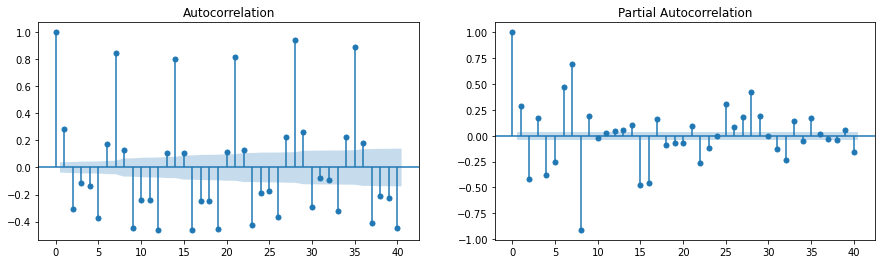

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(task1_df.iloc[8:]['d_val_s'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(task1_df.iloc[8:]['d_val_s'], lags=40, ax=axes[1])

<AxesSubplot:xlabel='date'>

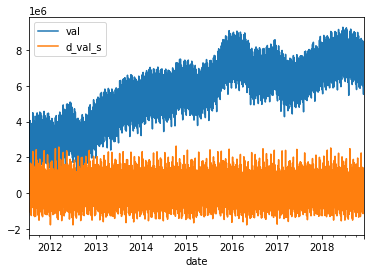

In [43]:
data = task1_df.copy()
data.index = pd.to_datetime(data['date'])
data.drop(columns='date',inplace=True)
data.plot()

In [47]:
model3 = sm.tsa.statespace.SARIMAX(data['d_val_s'], order=(6,1,6),seasonal_order=(6,1,1,7), freq='D')
results3=model3.fit()

C:\Users\Rog\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Rog\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


date
2011-07-13    0.000000e+00
2011-07-14    0.000000e+00
2011-07-15    0.000000e+00
2011-07-16    0.000000e+00
2011-07-17    0.000000e+00
                  ...     
2018-11-26   -1.106288e+06
2018-11-27   -4.122938e+05
2018-11-28   -5.340091e+05
2018-11-29   -8.551681e+05
2018-11-30    2.677913e+05
Name: forecast, Length: 2698, dtype: float64
Sum:131126.0584469836


<AxesSubplot:xlabel='date'>

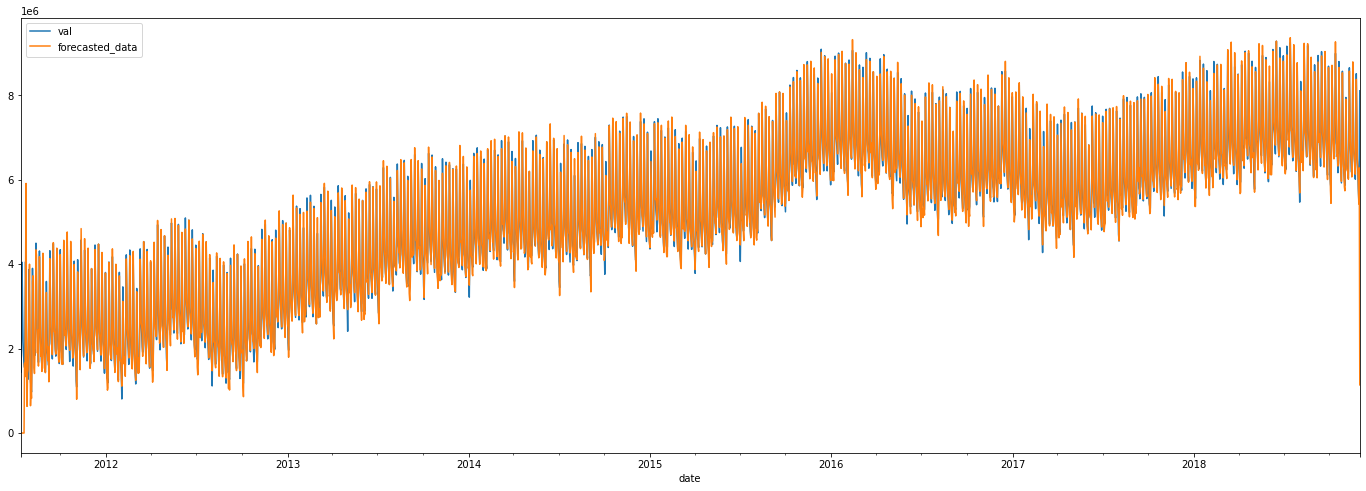

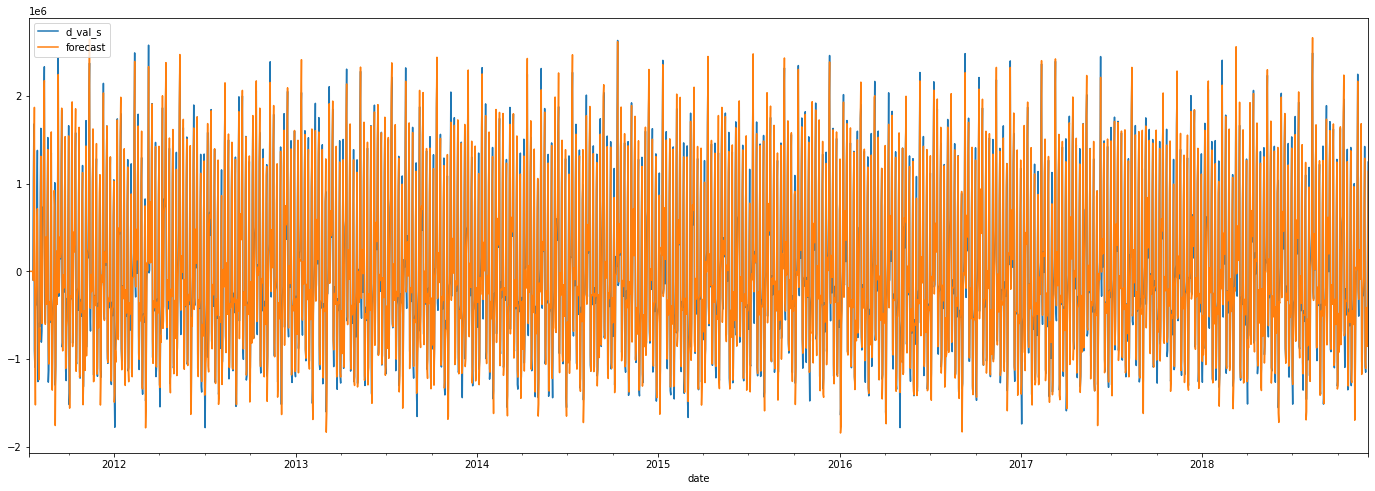

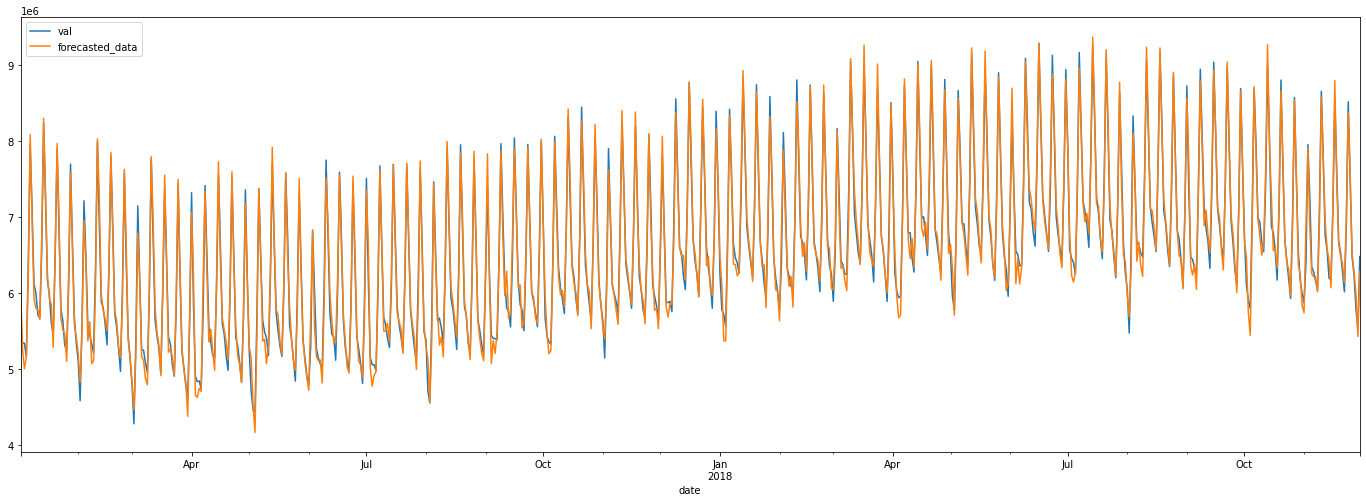

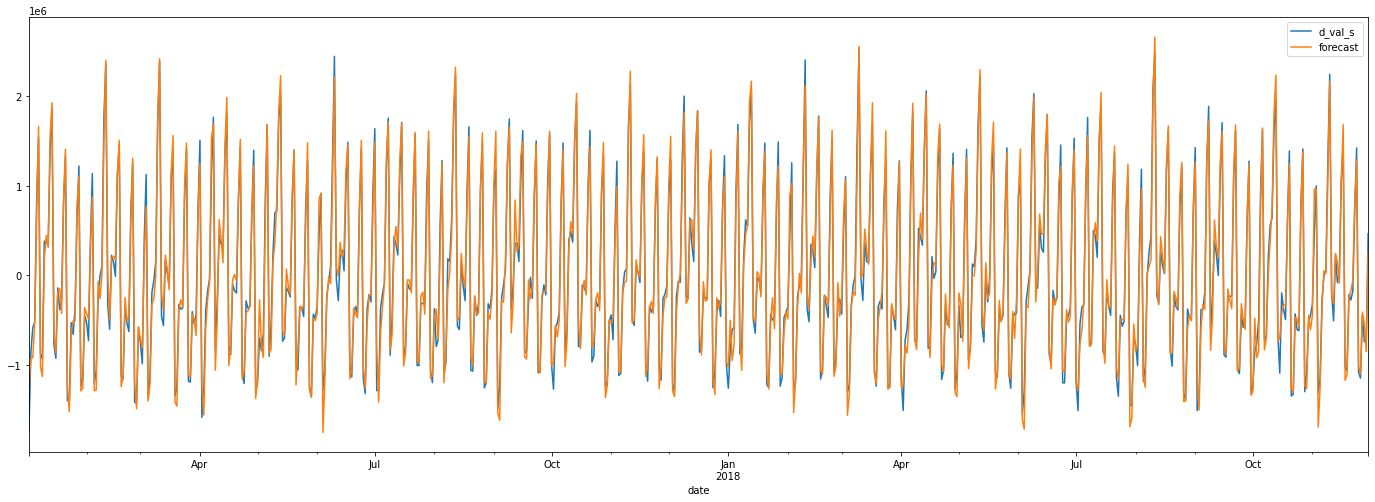

In [52]:
data['forecast']=results3.predict(start=0, end=2698, dynamic=False)
data['forecasted_data'] = data['forecast']
print(data.iloc[:2698]['forecast'])
for i in range(8, 2698):
    data['forecasted_data'][i] += data['val'][i-8]
diff_sum=0
for i in range(8, 2698):
    diff_sum += data['d_val_s'][i] - data['forecast'][i]
print("Sum:" + str(diff_sum))
data[['val','forecasted_data']].plot(figsize=(24,8))
data[['d_val_s','forecast']].plot(figsize=(24,8))
data[['val','forecasted_data']][2000:2698].plot(figsize=(24,8))
data[['d_val_s','forecast']][2000:2698].plot(figsize=(24,8))